In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_pickle('../data/processed/sustainalytics_dataset.pkl')
df.head()

,name,rating,content
0,1&1 Drillisch AG,21.1,1&1 Drillisch AG (formerly known as: Drillisch...
1,2i Rete Gas SpA,37.2,"Headquartered in Milan, 2i Rete Gas is the se..."
2,"2U, Inc.",15.7,"2U, Inc. (formerly 2tor Inc.) is an American e..."
4,3i Group PLC,12.6,3i Group plc is a British multinational privat...
5,3i Infrastructure PLC,22.1,3i Infrastructure plc (LSE: 3IN) is an investm...


<AxesSubplot:xlabel='rating'>

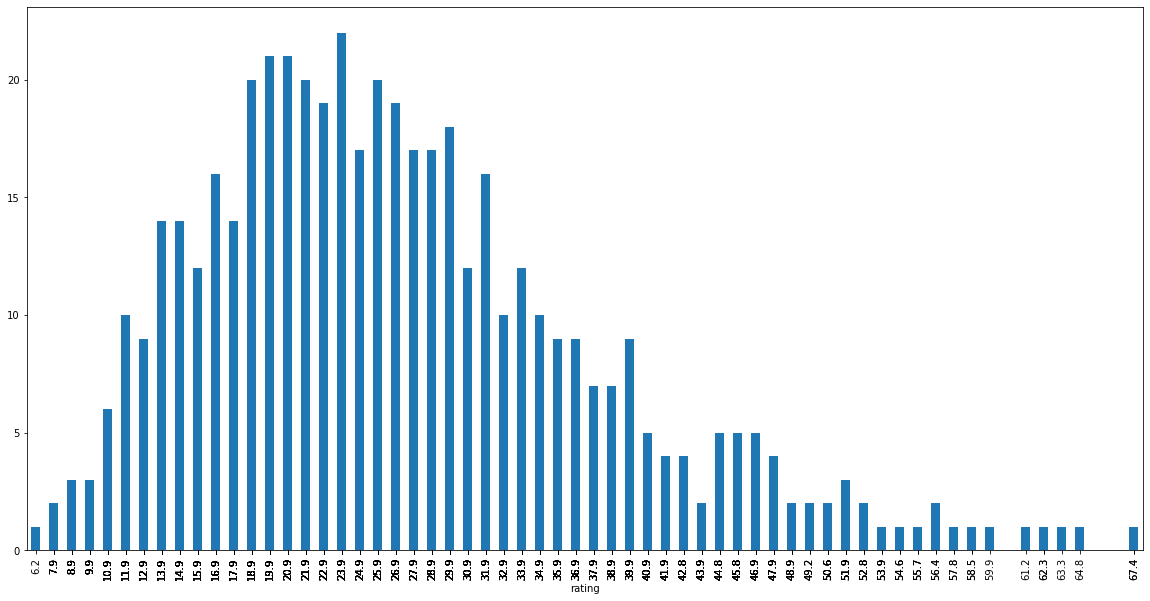

In [34]:
df.groupby('rating')['rating'].count().plot(kind='bar', figsize=(20,10))

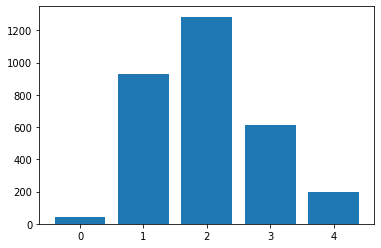

In [4]:
dico = {0:0, 1:0, 2:0, 3:0, 4:0}
for _, value in df['rating'].items():
    if value > 50:
        key_trunc = 4
    else:
        key_trunc = int(value / 10)
    if key_trunc in dico:   
        dico[key_trunc] += 1

plt.bar(range(len(dico)), list(dico.values()), align='center')
plt.xticks(range(len(dico)), list(dico.keys()))

plt.show()

In [5]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [6]:
def custom_tokenizer(row):
    c = Counter(tokenizer.tokenize(row.content))
    to_pop = []
    for key, value in c.items():
        if len(key) <= 3 or (len(key) >= 2 and key[0:2] == "##"):
            to_pop.append(key)
    for key in to_pop:
        c.pop(key, None)
    return c

df['word_counter'] = df.apply(lambda row: 
                              custom_tokenizer(row), axis = 1) 
df

,name,rating,content,word_counter
0,1&1 Drillisch AG,21.1,1&1 Drillisch AG (formerly known as: Drillisch...,"{'drill': 14, 'formerly': 1, 'known': 1, 'germ..."
1,2i Rete Gas SpA,37.2,"Headquartered in Milan, 2i Rete Gas is the se...","{'headquartered': 1, 'milan': 1, 'second': 1, ..."
2,"2U, Inc.",15.7,"2U, Inc. (formerly 2tor Inc.) is an American e...","{'formerly': 1, 'american': 1, 'educational': ..."
4,3i Group PLC,12.6,3i Group plc is a British multinational privat...,"{'group': 4, 'british': 2, 'multinational': 1,..."
5,3i Infrastructure PLC,22.1,3i Infrastructure plc (LSE: 3IN) is an investm...,"{'infrastructure': 1, 'investment': 1, 'busine..."
...,...,...,...,...
4412,Zoomlion Heavy Industry Science & Technology C...,41.8,Zoomlion Heavy Industry Science and Technology...,"{'zoom': 31, 'heavy': 3, 'industry': 4, 'scien..."
4414,"Zscaler, Inc.",18.6,Zscaler () is an American cloud-based informat...,"{'american': 1, 'cloud': 3, 'based': 1, 'infor..."
4415,ZTE Corporation,22.0,ZTE Corporation is a Chinese partially state-o...,"{'corporation': 4, 'chinese': 14, 'partially':..."
4417,Zurich Insurance Group AG,18.0,Zurich Insurance Group Ltd. is a Swiss insuran...,"{'zurich': 78, 'insurance': 40, 'group': 18, '..."


In [7]:
c0 = Counter()
c1 = Counter()
c2 = Counter()
c3 = Counter()
c4 = Counter()
for row in df.iterrows():
    if row[1].rating >= 40:
        c4 += row[1].word_counter
    elif row[1].rating >= 30:
        c3 += row[1].word_counter
    elif row[1].rating >= 20:
        c2 += row[1].word_counter
    elif row[1].rating >= 10:
        c1 += row[1].word_counter
    else:
        c0 += row[1].word_counter
    

In [8]:
print("***** Category 0 *****")
print(c0.most_common(15))
print("***** Category 1 *****")
print(c1.most_common(15))
print("***** Category 2 *****")
print(c2.most_common(15))
print("***** Category 3 *****")
print(c3.most_common(15))
print("***** Category 4 *****")
print(c4.most_common(15))

***** Category 0 *****
[('company', 508), ('with', 369), ('that', 280), ('group', 225), ('from', 200), ('bert', 183), ('million', 182), ('acquired', 168), ('business', 159), ('also', 149), ('which', 140), ('billion', 133), ('development', 120), ('sold', 113), ('management', 102)]
***** Category 1 *****
[('company', 13491), ('with', 10975), ('that', 8791), ('from', 6187), ('which', 4602), ('million', 4237), ('also', 3997), ('group', 3742), ('were', 3607), ('business', 3541), ('first', 3448), ('announced', 3286), ('acquired', 3034), ('billion', 2948), ('services', 2757)]
***** Category 2 *****
[('company', 18024), ('with', 13484), ('that', 10447), ('from', 8048), ('bank', 5921), ('which', 5552), ('million', 5528), ('also', 5289), ('group', 5284), ('business', 4637), ('first', 4544), ('were', 4254), ('billion', 4035), ('announced', 3768), ('services', 3741)]
***** Category 3 *****
[('company', 8986), ('with', 5913), ('that', 4425), ('from', 3697), ('million', 2731), ('which', 2620), ('als

In [31]:
cg = c0 + c1 + c2 + c3 + c4

# number of words
m0 = sum([c0[key] for key in c0])
m1 = sum([c1[key] for key in c1])
m2 = sum([c2[key] for key in c2])
m3 = sum([c3[key] for key in c3])
m4 = sum([c4[key] for key in c4])
mg = m0 + m1 + m2 + m3 + m4

# frequency dict
fg = { key: value / mg for key, value in cg.items()}
f0 = { key: value / m0 - fg[key] for key, value in c0.items()}
f1 = { key: value / m1 - fg[key] for key, value in c1.items()}
f2 = { key: value / m2 - fg[key] for key, value in c2.items()}
f3 = { key: value / m3 - fg[key] for key, value in c3.items()}
f4 = { key: value / m4 - fg[key] for key, value in c4.items()}


print("***** Category 0 *****")
print([item[0] for item in sorted(f0.items(), key= lambda item: -item[1])][:30])
print("***** Category 1 *****")
print([item[0] for item in sorted(f1.items(), key= lambda item: -item[1])][:30])
print("***** Category 2 *****")
print([item[0] for item in sorted(f2.items(), key= lambda item: -item[1])][:30])
print("***** Category 3 *****")
print([item[0] for item in sorted(f3.items(), key= lambda item: -item[1])][:30])
print("***** Category 4 *****")
print([item[0] for item in sorted(f4.items(), key= lambda item: -item[1])][:30])
print("***** Global *****")
print([item[0] for item in sorted(fg.items(), key= lambda item: -item[1])][:30])

***** Category 0 *****
['bert', 'group', 'development', 'pearson', 'property', 'acquired', 'publishing', 'real', 'estate', 'sold', 'centres', 'france', 'education', 'shopping', 'westfield', 'flex', 'centro', 'management', 'portfolio', 'house', 'business', 'countries', 'properties', 'else', 'sector', 'investment', 'million', 'silver', 'printing', 'display']
***** Category 1 *****
['software', 'that', 'apple', 'media', 'data', 'television', 'with', 'digital', 'entertainment', 'their', 'intel', 'game', 'news', 'games', 'cloud', 'netflix', 'nokia', 'disney', 'microsoft', 'announced', 'service', 'stores', 'sports', 'video', 'this', 'real', 'canadian', 'computer', 'network', 'time']
***** Category 2 *****
['bank', 'samsung', 'insurance', 'mobile', 'services', 'banking', 'operators', 'financial', '[UNK]', 'coca', 'cola', 'thai', 'renault', 'telecom', 'carr', 'banks', 'line', 'customers', 'fixed', 'international', 'stores', 'suzuki', 'credit', 'opened', 'japan', 'starbucks', 'store', 'life', '